In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np

Download the dataset here:

https://data.opendatasoft.com/explore/dataset/the-tate-collection%40public/information/

In [2]:
df = pd.read_csv('./data/the-tate-collection_public.csv', delimiter=';', 
                 usecols=['artist', 'artistRole', 'medium',
        'year', 'acquisitionYear', 'width',
       'height', 'units',]
                )
df.columns

Index(['artist', 'artistRole', 'medium', 'year', 'acquisitionYear', 'width',
       'height', 'units'],
      dtype='object')

**Questions**

- Aspect dimensions

- Year of drawing and acquisition

- Materials

**Technical aspect**

- Joint plots

In [3]:
df = df.dropna()
print(df['units'].value_counts())

mm    55328
Name: units, dtype: int64


In [4]:
sns.set_style('whitegrid')

In [5]:
df['width_cm'] = df['width'] / 10
df['height_cm'] = df['height'] / 10

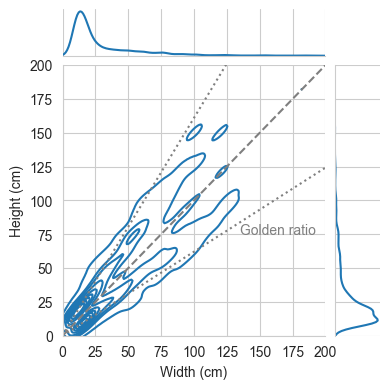

In [6]:
sns.jointplot(data=df.query("(width_cm < 200) & (height_cm < 200)"), 
              x='width_cm', y='height_cm', 
              height=4, xlim=(0, 200), ylim=(0, 200),
              kind='kde')
ax=plt.gca()

ax.set_xlabel('Width (cm)')
ax.set_ylabel('Height (cm)')

ax.set_xticks(np.linspace(0, 200, 9))
ax.set_yticks(np.linspace(0, 200, 9))

xx = np.linspace(0, 200, 9)
ax.plot(xx, xx, '--', color='C7')
ax.plot(xx, 1.61 * xx, ':', color='C7')
ax.plot(xx, 1/1.61 * xx, ':', color='C7')

ax.text(135, 75, 'Golden ratio', color='C7')

plt.savefig('./plots/2023-10-13_tate_aspect_ratio.png', dpi=150, bbox_inches='tight')
plt.show()

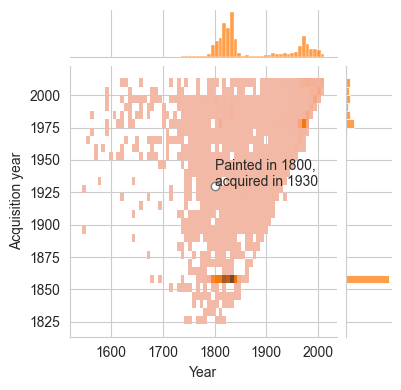

In [7]:
sns.jointplot(data=df, 
              x='year', y='acquisitionYear', 
              height=4,
              kind='hist', color='C1')

ax=plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Acquisition year')

ax.scatter(1800, 1930, color='C7', facecolor='w')
ax.annotate('Painted in 1800,\nacquired in 1930', (1800, 1930))

plt.savefig('./plots/2023-10-13_tate_year_acquisition.png', dpi=150, bbox_inches='tight')
plt.show()

In [25]:
cond = df['medium'].apply(lambda x: 'on ' in x)

In [26]:
df = df[cond]

In [27]:
df['material'] = df['medium'].apply(lambda x: x.split('on ')[1])

In [28]:
counts = df['material'].value_counts()

In [31]:
rep = {}
    
for k in df['material'].unique():
    if 'paper' in k:
        rep[k] = 'paper'
    if 'canvas' in k:
        rep[k] = 'canvas'
    if k == ''or 'and ' in k:
        rep[k] = 'other'
    if 'wood' in k:
        rep[k] = 'wood'
    if 'mahogany' in k:
        rep[k] = 'mahogany'
    if 'paper' in k:
        rep[k] = None
    if k.endswith(' '):
        rep[k] = k.strip()
    if k.startswith('and '):
        rep[k] = 'other'
        
for k in list(counts[counts < 20].to_dict().keys()):
    rep[k] = 'other'
    
df = df.replace({'material': rep})
df = df.dropna()

In [32]:
df['material'].value_counts()

canvas         3692
other           810
wood            339
board           323
hardboard        83
mahogany         79
card             52
oak              28
marble base      21
Name: material, dtype: int64

C:\Users\k202141\anaconda3\envs\dlcourse\lib\site-packages\seaborn\distributions.py:1191: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


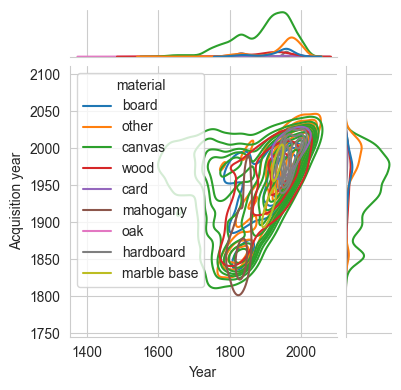

In [37]:
fig = sns.jointplot(data=df, x='year', y='acquisitionYear',
              height=4, kind='kde',
              hue='material')

ax=plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Acquisition year')

sns.move_legend(ax, loc=2)

plt.savefig('./plots/2023-10-13_tate_year_acquisition_hue.png', dpi=150, bbox_inches='tight')
plt.show()
